In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv("../stock_list.csv")
df.head()

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False


In [6]:
df.columns

Index(['SecuritiesCode', 'EffectiveDate', 'Name', 'Section/Products',
       'NewMarketSegment', '33SectorCode', '33SectorName', '17SectorCode',
       '17SectorName', 'NewIndexSeriesSizeCode', 'NewIndexSeriesSize',
       'TradeDate', 'Close', 'IssuedShares', 'MarketCapitalization',
       'Universe0'],
      dtype='object')

In [8]:
df.isna().sum()

SecuritiesCode              0
EffectiveDate               0
Name                        0
Section/Products            0
NewMarketSegment          645
33SectorCode                0
33SectorName                0
17SectorCode                0
17SectorName                0
NewIndexSeriesSizeCode      0
NewIndexSeriesSize          0
TradeDate                 296
Close                     296
IssuedShares              296
MarketCapitalization      296
Universe0                   0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
df['NewMarketSegment'].value_counts()

Prime Market                       1839
Standard Market                    1466
Growth Market                       461
Growth Market (Foreign Stock)         3
Standard Market (Foreign Stock)       2
Prime Market (Foreign Stock)          1
Name: NewMarketSegment, dtype: int64

In [19]:
df['IssuedShares'].value_counts()

6.000000e+06    7
2.000000e+06    6
6.000000e+04    6
5.500000e+06    5
1.000000e+05    5
               ..
1.655446e+09    1
1.397297e+07    1
9.362000e+05    1
4.116400e+06    1
3.424696e+07    1
Name: IssuedShares, Length: 4011, dtype: int64

In [12]:
df['TradeDate'].value_counts()

20211230.0    4049
20211229.0      37
20211228.0      18
20211227.0       6
20211220.0       3
20211221.0       2
20211222.0       2
20211223.0       2
20211216.0       1
20211224.0       1
Name: TradeDate, dtype: int64

(array([4.087e+03, 2.200e+01, 7.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([2.24200000e+03, 1.63150076e+09, 3.26299929e+09, 4.89449781e+09,
        6.52599633e+09, 8.15749485e+09, 9.78899337e+09, 1.14204919e+10,
        1.30519904e+10, 1.46834889e+10, 1.63149875e+10]),
 <BarContainer object of 10 artists>)

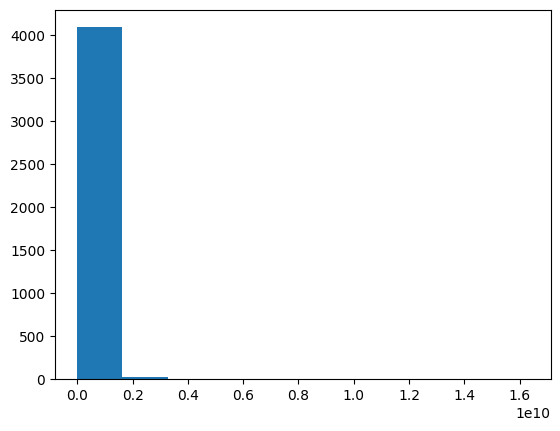

In [20]:
plt.hist(df['IssuedShares'])

In [24]:
df['33SectorName'].value_counts()

Information & Communication                      551
Services                                         521
-                                                500
Retail Trade                                     359
Wholesale Trade                                  320
Electric Appliances                              255
Machinery                                        230
Chemicals                                        218
Construction                                     170
Real Estate                                      143
Foods                                            125
Other Products                                   116
Transportation Equipment                          95
Banks                                             93
Metal Products                                    90
Pharmaceutical                                    77
Land Transportation                               62
Glass and Ceramics Products                       56
Textiles and Apparels                         

In [25]:
len(df['33SectorName'].value_counts())

34